In [101]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

2.8.0


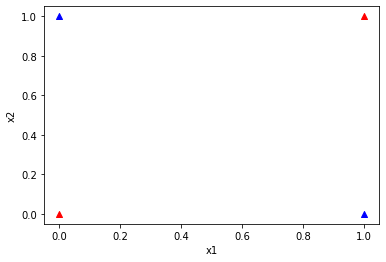

In [102]:
x_data = tf.constant([[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]], dtype=tf.float32)
y_data = tf.constant([[0],
          [1],
          [1],
          [0]], dtype=tf.float32)

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [103]:
W1 = tf.Variable(tf.random.normal((2, 1)), name='weight1')
b1 = tf.Variable(tf.random.normal((1,)), name='bias1')

W2 = tf.Variable(tf.random.normal((2, 1)), name='weight2')
b2 = tf.Variable(tf.random.normal((1,)), name='bias2')

W3 = tf.Variable(tf.random.normal((2, 1)), name='weight3')
b3 = tf.Variable(tf.random.normal((1,)), name='bias3')

In [105]:
# create hypothesis
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
#     layer3 = tf.concat([layer1, layer2],-1)
#     layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(tf.concat([layer1, layer2], 1), W3) + b3)
    return hypothesis
    
# get loss
def loss_fn(hypothesis, labels):
    cost = -labels*(tf.math.log(hypothesis))-(1-labels)*tf.math.log(1 - hypothesis)
    cost_mean = tf.reduce_mean(cost)
    return cost_mean

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# cut value by decision boundary
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

# get hypothesis
def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])


In [108]:
EPOCHS = 50000

for i in range(EPOCHS):
    gradients = grad(x_data, y_data)
    optimizer.apply_gradients(grads_and_vars=zip(gradients,[W1, W2, W3, b1, b2, b3]))
    if i % 500 == 0:
        print("Iter: {}, Loss: {:.4f}".format(i, loss_fn(neural_net(x_data),y_data)))
            
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6896
Iter: 500, Loss: 0.6892
Iter: 1000, Loss: 0.6887
Iter: 1500, Loss: 0.6882
Iter: 2000, Loss: 0.6876
Iter: 2500, Loss: 0.6870
Iter: 3000, Loss: 0.6862
Iter: 3500, Loss: 0.6854
Iter: 4000, Loss: 0.6845
Iter: 4500, Loss: 0.6834
Iter: 5000, Loss: 0.6822
Iter: 5500, Loss: 0.6809
Iter: 6000, Loss: 0.6794
Iter: 6500, Loss: 0.6777
Iter: 7000, Loss: 0.6759
Iter: 7500, Loss: 0.6738
Iter: 8000, Loss: 0.6715
Iter: 8500, Loss: 0.6689
Iter: 9000, Loss: 0.6661
Iter: 9500, Loss: 0.6630
Iter: 10000, Loss: 0.6596
Iter: 10500, Loss: 0.6559
Iter: 11000, Loss: 0.6519
Iter: 11500, Loss: 0.6476
Iter: 12000, Loss: 0.6430
Iter: 12500, Loss: 0.6381
Iter: 13000, Loss: 0.6330
Iter: 13500, Loss: 0.6276
Iter: 14000, Loss: 0.6221
Iter: 14500, Loss: 0.6165
Iter: 15000, Loss: 0.6108
Iter: 15500, Loss: 0.6051
Iter: 16000, Loss: 0.5995
Iter: 16500, Loss: 0.5939
Iter: 17000, Loss: 0.5885
Iter: 17500, Loss: 0.5832
Iter: 18000, Loss: 0.5781
Iter: 18500, Loss: 0.5733
Iter: 19000, Loss: 0.5686
Iter: 1950